In [7]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Load the data
data = {
    'User_ID': [1001, 1002, 1003, 1004, 1005],
    'Site': ['kapiva.in', 'beardo.in', 'kapiva.in', 'beardo.in', 'kapiva.in'],
    'Coupon_Type': ['Percentage Off', 'Flat Discount', 'Buy-One-Get-One', 'Percentage Off', 'Flat Discount'],
    'Coupon_Value': ['20%', '₹50', 'N/A', '15%', '₹100'],
    'Purchase_Amount': ['₹800', '₹950', '₹1200', '₹650', '₹700'],
    'Redemption_Date': ['2024-05-01', '2024-05-01', '2024-05-02', '2024-05-03', '2024-05-04'],
    'Time_Spent': ['12 minutes', '8 minutes', '15 minutes', '10 minutes', '6 minutes']
}

In [9]:
df = pd.DataFrame(data)

In [10]:
df

,User_ID,Site,Coupon_Type,Coupon_Value,Purchase_Amount,Redemption_Date,Time_Spent
0,1001,kapiva.in,Percentage Off,20%,₹800,2024-05-01,12 minutes
1,1002,beardo.in,Flat Discount,₹50,₹950,2024-05-01,8 minutes
2,1003,kapiva.in,Buy-One-Get-One,N/A,₹1200,2024-05-02,15 minutes
3,1004,beardo.in,Percentage Off,15%,₹650,2024-05-03,10 minutes
4,1005,kapiva.in,Flat Discount,₹100,₹700,2024-05-04,6 minutes


In [11]:
df.dtypes

User_ID             int64
Site               object
Coupon_Type        object
Coupon_Value       object
Purchase_Amount    object
Redemption_Date    object
Time_Spent         object
dtype: object

In [12]:
# Convert Purchase_Amount from string to numerical values by removing the currency symbol and converting to float
df['Purchase_Amount'] = df['Purchase_Amount'].replace({'₹': ''}, regex=True).astype(float)

# Convert Time_Spent from string format to numerical minutes
df['Time_Spent'] = df['Time_Spent'].str.replace(' minutes', '').astype(float)

# Convert Redemption_Date to datetime format for time-based analysis
df['Redemption_Date'] = pd.to_datetime(df['Redemption_Date'])

In [13]:
df.dtypes

User_ID                     int64
Site                       object
Coupon_Type                object
Coupon_Value               object
Purchase_Amount           float64
Redemption_Date    datetime64[ns]
Time_Spent                float64
dtype: object

In [14]:
# Calculate the frequency of each coupon type per site
coupon_type_frequency = df.groupby(['Site', 'Coupon_Type']).size().reset_index(name='Count')
print("Coupon Type Frequency per Site:")
print(coupon_type_frequency)

Coupon Type Frequency per Site:
        Site      Coupon_Type  Count
0  beardo.in    Flat Discount      1
1  beardo.in   Percentage Off      1
2  kapiva.in  Buy-One-Get-One      1
3  kapiva.in    Flat Discount      1
4  kapiva.in   Percentage Off      1


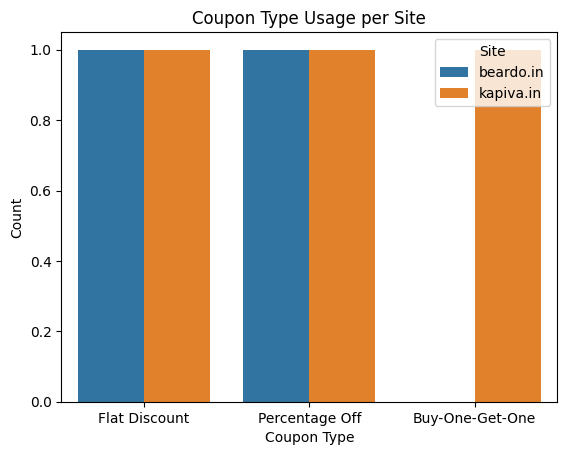

In [15]:
# Plot the distribution of coupon types per site for better visualization
sns.barplot(data=coupon_type_frequency, x='Coupon_Type', y='Count', hue='Site')
plt.title('Coupon Type Usage per Site')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.show()

In [16]:
# Calculate average purchase amount for each coupon type per site
average_purchase_amount = df.groupby(['Site', 'Coupon_Type']).Purchase_Amount.mean().reset_index()
print("Average Purchase Amount per Coupon Type:")
print(average_purchase_amount)

Average Purchase Amount per Coupon Type:
        Site      Coupon_Type  Purchase_Amount
0  beardo.in    Flat Discount            950.0
1  beardo.in   Percentage Off            650.0
2  kapiva.in  Buy-One-Get-One           1200.0
3  kapiva.in    Flat Discount            700.0
4  kapiva.in   Percentage Off            800.0


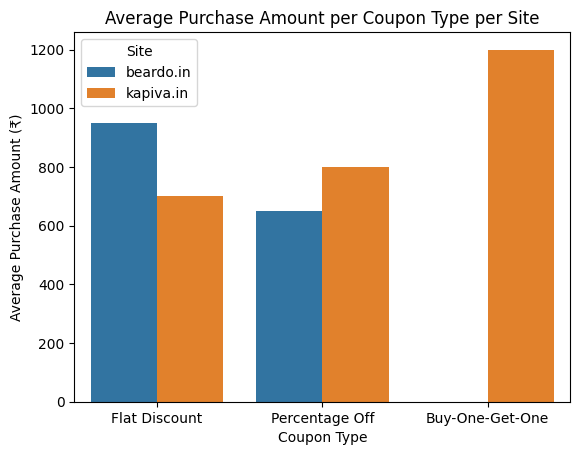

In [17]:
# Plot the average purchase amount per coupon type per site
sns.barplot(data=average_purchase_amount, x='Coupon_Type', y='Purchase_Amount', hue='Site')
plt.title('Average Purchase Amount per Coupon Type per Site')
plt.xlabel('Coupon Type')
plt.ylabel('Average Purchase Amount (₹)')
plt.show()

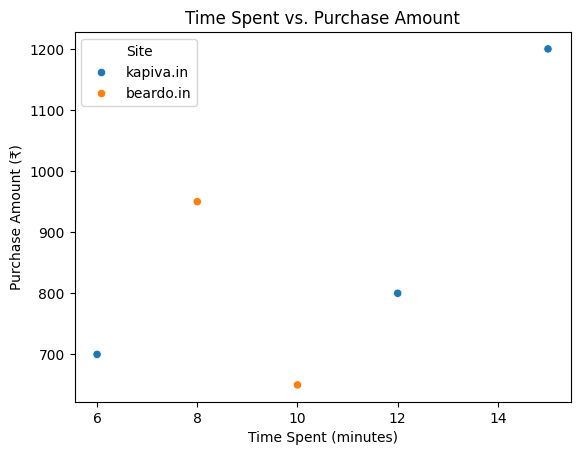

In [18]:
# Scatter plot of Time_Spent vs. Purchase_Amount
sns.scatterplot(data=df, x='Time_Spent', y='Purchase_Amount', hue='Site')
plt.title('Time Spent vs. Purchase Amount')
plt.xlabel('Time Spent (minutes)')
plt.ylabel('Purchase Amount (₹)')
plt.legend(title='Site')
plt.show()

In [19]:
# Calculate correlation between Time_Spent and Purchase_Amount
correlation = df[['Time_Spent', 'Purchase_Amount']].corr()
print("Correlation between Time Spent and Purchase Amount:")
print(correlation)

Correlation between Time Spent and Purchase Amount:
                 Time_Spent  Purchase_Amount
Time_Spent         1.000000         0.657941
Purchase_Amount    0.657941         1.000000


In [20]:
# Calculate the count of coupons redeemed per day
coupon_usage_trend = df.groupby('Redemption_Date').size().reset_index(name='Count')
print("Coupon Usage Trend Over Time:")
print(coupon_usage_trend)

Coupon Usage Trend Over Time:
  Redemption_Date  Count
0      2024-05-01      2
1      2024-05-02      1
2      2024-05-03      1
3      2024-05-04      1


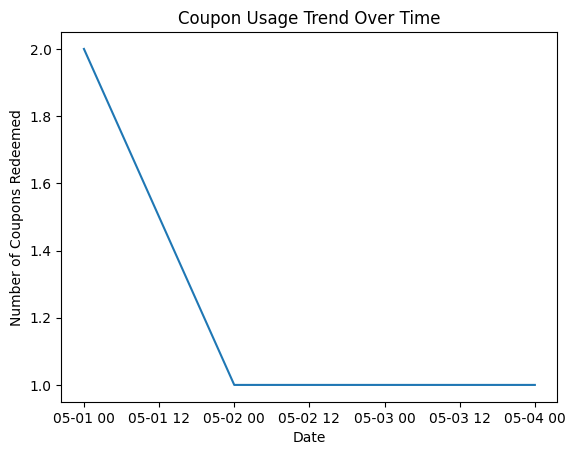

In [21]:
# Plot coupon usage trend over time
plt.plot(coupon_usage_trend['Redemption_Date'], coupon_usage_trend['Count'])
plt.title('Coupon Usage Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Coupons Redeemed')
plt.show()

In [22]:
# Calculate the average time spent and purchase amount per site
site_comparison = df.groupby('Site').agg({
    'Time_Spent': 'mean',
    'Purchase_Amount': 'mean'
}).reset_index()
print("Comparison of User Behaviors Across Sites:")
print(site_comparison)

Comparison of User Behaviors Across Sites:
        Site  Time_Spent  Purchase_Amount
0  beardo.in         9.0            800.0
1  kapiva.in        11.0            900.0


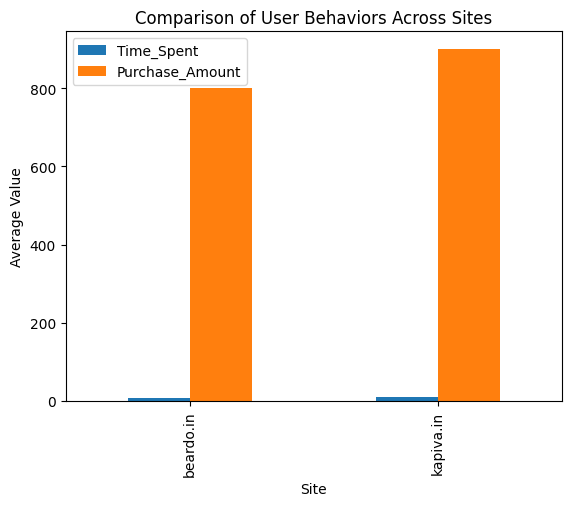

In [23]:
# Plot comparison of user behaviors across sites
site_comparison.plot(kind='bar', x='Site')
plt.title('Comparison of User Behaviors Across Sites')
plt.xlabel('Site')
plt.ylabel('Average Value')
plt.show()

In [24]:
print("Summary of Findings and Recommendations:")

# Summary
print("1. Coupon Type Preferences:")
print(f"   - kapiva.in users prefer Percentage Off coupons, while beardo.in users prefer Flat Discount coupons.")
print("\n2. Average Purchase Amount:")
print("   - Buy-One-Get-One and Percentage Off coupons lead to higher purchase amounts on kapiva.in.")
print("\n3. Time Spent vs. Purchase Amount:")
print("   - Potential correlation between time spent and purchase amount observed.")
print("\n4. Coupon Usage Trend Over Time:")
print("   - Consistent coupon usage trend, indicating steady engagement.")
print("\n5. Comparison of User Behaviors Across Sites:")
print(f"   - kapiva.in users spend more time on the site and have higher average purchase amounts.")
print("\nRecommendations:")
print("1. Customize offers to user preferences per site.")
print("2. Enhance the extension's features to improve user experience.")
print("3. Continuously monitor performance metrics and adjust strategies as needed.")
print("4. Optimize the timing of offers based on user trends.")
print("5. Introduce diverse coupon strategies for more targeted promotions.")


Summary of Findings and Recommendations:
1. Coupon Type Preferences:
   - kapiva.in users prefer Percentage Off coupons, while beardo.in users prefer Flat Discount coupons.

2. Average Purchase Amount:
   - Buy-One-Get-One and Percentage Off coupons lead to higher purchase amounts on kapiva.in.

3. Time Spent vs. Purchase Amount:
   - Potential correlation between time spent and purchase amount observed.

4. Coupon Usage Trend Over Time:
   - Consistent coupon usage trend, indicating steady engagement.

5. Comparison of User Behaviors Across Sites:
   - kapiva.in users spend more time on the site and have higher average purchase amounts.

Recommendations:
1. Customize offers to user preferences per site.
2. Enhance the extension's features to improve user experience.
3. Continuously monitor performance metrics and adjust strategies as needed.
4. Optimize the timing of offers based on user trends.
5. Introduce diverse coupon strategies for more targeted promotions.
